In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from process_data import prepare_real_estate, prepare_concrete
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from process_data import prepare_abalone, prepare_concrete, prepare_bank, prepare_iris, prepare_real_estate, prepare_ecoli

In [11]:
def msse(pred, y):
    return np.sum((y - pred)**2) / y.shape[0]

In [27]:
def plot_predictions(pred, y, title, path):
    fig = plt.figure(figsize=(7, 7))
    # clear
    ax1 = plt.subplot(111)
    ax1.scatter(pred, y, alpha=0.2)
    ax1.set_title(title)
    ax1.set_xlabel('predicted')
    ax1.set_ylabel('true')
    ax1.plot(np.arange(0, y.max(), 0.1), np.arange(0, y.max(), 0.1))
    plt.savefig(path)

In [28]:
def plot_confusion(pred, y, classes, title, path):
    fig = plt.figure(figsize=(7, 7))
    mat = confusion_matrix(pred, y)
    cm = mat / np.sum(mat, axis=1).reshape(-1, 1)
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.savefig(path)

## Abalone

In [29]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_abalone()

/afs/inf.ed.ac.uk/user/s13/s1313418/Dissertation/process_data.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])
/afs/inf.ed.ac.uk/user/s13/s1313418/miniconda3/envs/diss/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


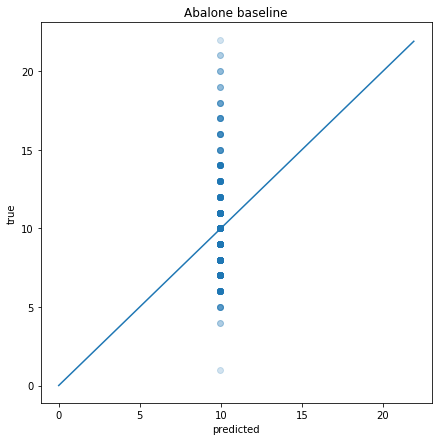

In [30]:
reg = DummyRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Abalone baseline', 'graphs/abalone/test/abalone_baseline.pdf')

In [31]:
msse(pred, y_test)

9.689555027638841

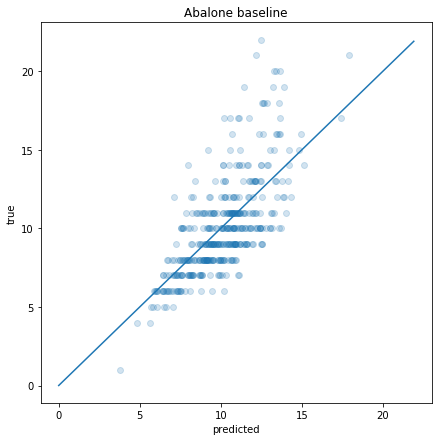

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Abalone baseline', 'graphs/abalone/test/abalone_baseline.pdf')

In [33]:
msse(pred, y_test)

4.813028261378075

## Concrete

In [34]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_concrete()

/afs/inf.ed.ac.uk/user/s13/s1313418/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/afs/inf.ed.ac.uk/user/s13/s1313418/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/afs/inf.ed.ac.uk/user/s13/s1313418/Dissertation/process_data.py:56: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_val = X_scaler.transform(X_val)
/afs/inf.ed.ac.uk/user/s13/s1313418/Dissertation/process_data.py:57: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test = X_scaler.transform(X_test)


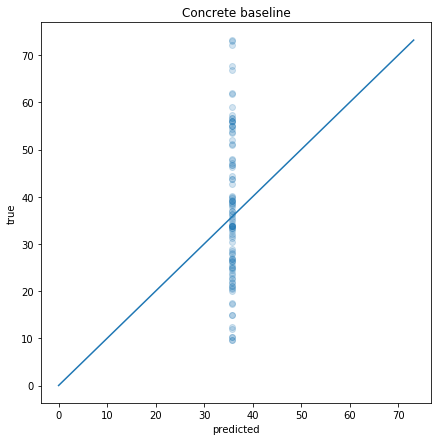

In [18]:
reg = DummyRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Concrete baseline', 'graphs/concrete/test/concrete_baseline.pdf')

In [19]:
msse(pred, y_test)

231.97196322449489

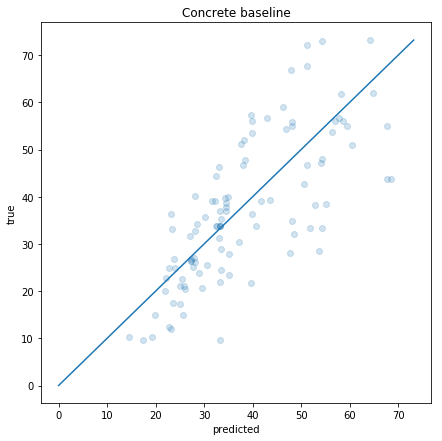

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Concrete baseline', 'graphs/concrete/test/concrete_baseline.pdf')

In [36]:
msse(pred, y_test)

107.46117460817877

## Bank

In [64]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_bank()

In [65]:
y_train.shape

(1098, 1)

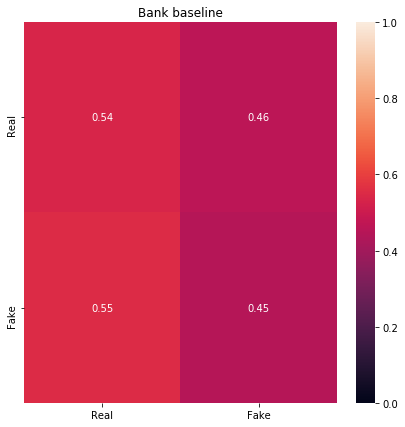

In [66]:
classifier = DummyClassifier()
classifier.fit(X_train, y_train.flatten())
pred = classifier.predict(X_test)
plot_confusion(pred, y_test, ['Real', 'Fake'], 'Bank baseline', 'graphs/bank/test/bank_baseline.pdf')

In [67]:
accuracy_score(pred, y_test)

0.5

## Iris

In [52]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_iris()

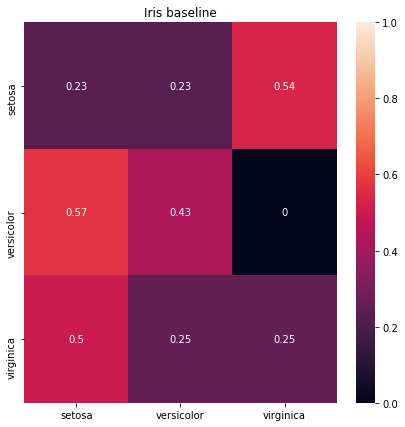

In [53]:
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
plot_confusion(pred.argmax(axis=1), y_test.argmax(axis=1), ['setosa', 'versicolor', 'virginica'], 
               'Iris baseline', 'graphs/iris/test/iris_baseline.pdf')

In [54]:
accuracy_score(pred.argmax(axis=1), y_test.argmax(axis=1))

0.2916666666666667

## Real Estate

In [37]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_real_estate()

/afs/inf.ed.ac.uk/user/s13/s1313418/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/afs/inf.ed.ac.uk/user/s13/s1313418/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/afs/inf.ed.ac.uk/user/s13/s1313418/Dissertation/process_data.py:124: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_val = X_scaler.transform(X_val)
/afs/inf.ed.ac.uk/user/s13/s1313418/Dissertation/process_data.py:125: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test = X_scaler.transform(X_test)


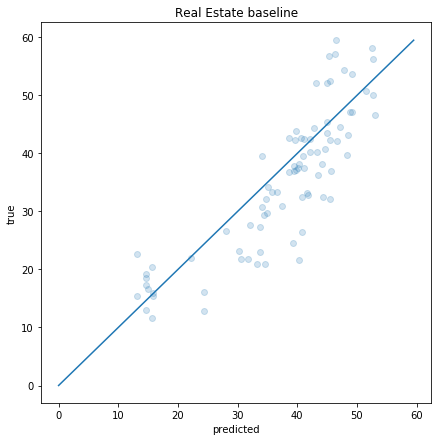

In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Real Estate baseline', 'graphs/real_estate/test/real_estate_baseline.pdf')

In [39]:
msse(pred, y_test)

45.81685155498109

## Ecoli

In [81]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_ecoli()

/afs/inf.ed.ac.uk/user/s13/s1313418/miniconda3/envs/diss/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


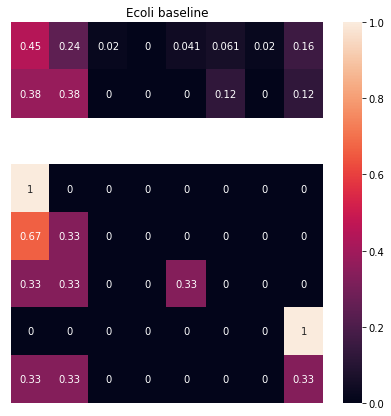

In [82]:
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
plot_confusion(pred.argmax(axis=1), y_test.argmax(axis=1), [],
               'Ecoli baseline', 'graphs/ecoli/test/ecoli_baseline.pdf')

In [83]:
accuracy_score(pred.argmax(axis=1), y_test.argmax(axis=1))

0.38235294117647056

In [29]:
np.random.seed(42)
import random as rn
rn.seed(12345)
tf.set_random_seed(82)

In [30]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_concrete()

/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/simon/Dissertation/process_data.py:56: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_val = X_scaler.transform(X_val)
/home/simon/Dissertation/process_data.py:57: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test = X_scaler.transform(X_test)


In [66]:
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(1)
])
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [67]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')
history = model.fit(X_train, y_train, epochs=1000, validation_data=[X_val, y_val], callbacks=[early_stop])

Train on 825 samples, validate on 102 samples
Epoch 1/1000
825/825 [==============================] - 1s 1ms/step - loss: 1548.2824 - mean_absolute_error: 35.5614 - val_loss: 1562.4445 - val_mean_absolute_error: 35.9478
Epoch 2/1000
825/825 [==============================] - 0s 285us/step - loss: 1537.3232 - mean_absolute_error: 35.4612 - val_loss: 1552.8744 - val_mean_absolute_error: 35.8559
Epoch 3/1000
825/825 [==============================] - 0s 321us/step - loss: 1525.9438 - mean_absolute_error: 35.3489 - val_loss: 1542.8411 - val_mean_absolute_error: 35.7583
Epoch 4/1000
825/825 [==============================] - 0s 287us/step - loss: 1514.4222 - mean_absolute_error: 35.2407 - val_loss: 1531.9505 - val_mean_absolute_error: 35.6528
Epoch 5/1000
825/825 [==============================] - 0s 298us/step - loss: 1502.1583 - mean_absolute_error: 35.1198 - val_loss: 1520.9649 - val_mean_absolute_error: 35.5455
Epoch 6/1000
825/825 [==============================] - 0s 267us/step - loss

Epoch 47/1000
825/825 [==============================] - 0s 146us/step - loss: 694.8497 - mean_absolute_error: 21.5157 - val_loss: 701.6599 - val_mean_absolute_error: 22.0678
Epoch 48/1000
825/825 [==============================] - 0s 125us/step - loss: 683.5633 - mean_absolute_error: 21.2988 - val_loss: 689.4925 - val_mean_absolute_error: 21.8371
Epoch 49/1000
825/825 [==============================] - 0s 104us/step - loss: 671.7140 - mean_absolute_error: 21.0693 - val_loss: 677.7093 - val_mean_absolute_error: 21.6158
Epoch 50/1000
825/825 [==============================] - 0s 106us/step - loss: 660.2123 - mean_absolute_error: 20.8246 - val_loss: 666.3595 - val_mean_absolute_error: 21.4012
Epoch 51/1000
825/825 [==============================] - 0s 99us/step - loss: 649.0146 - mean_absolute_error: 20.6086 - val_loss: 655.3534 - val_mean_absolute_error: 21.1905
Epoch 52/1000
825/825 [==============================] - 0s 98us/step - loss: 638.6127 - mean_absolute_error: 20.4106 - val_lo

Epoch 94/1000
825/825 [==============================] - 0s 114us/step - loss: 353.9669 - mean_absolute_error: 14.3694 - val_loss: 354.4724 - val_mean_absolute_error: 14.8441
Epoch 95/1000
825/825 [==============================] - 0s 130us/step - loss: 349.4998 - mean_absolute_error: 14.2333 - val_loss: 350.0608 - val_mean_absolute_error: 14.7461
Epoch 96/1000
825/825 [==============================] - 0s 311us/step - loss: 348.0943 - mean_absolute_error: 14.2867 - val_loss: 345.7702 - val_mean_absolute_error: 14.6439
Epoch 97/1000
825/825 [==============================] - 0s 288us/step - loss: 341.9928 - mean_absolute_error: 14.0851 - val_loss: 341.4244 - val_mean_absolute_error: 14.5429
Epoch 98/1000
825/825 [==============================] - 0s 182us/step - loss: 337.3203 - mean_absolute_error: 13.9443 - val_loss: 337.2728 - val_mean_absolute_error: 14.4418
Epoch 99/1000
825/825 [==============================] - 0s 94us/step - loss: 332.7599 - mean_absolute_error: 13.8621 - val_l

825/825 [==============================] - 0s 300us/step - loss: 211.5373 - mean_absolute_error: 10.4744 - val_loss: 212.3399 - val_mean_absolute_error: 10.9999
Epoch 141/1000
825/825 [==============================] - 0s 141us/step - loss: 211.1498 - mean_absolute_error: 10.5020 - val_loss: 210.0974 - val_mean_absolute_error: 10.9071
Epoch 142/1000
825/825 [==============================] - 0s 320us/step - loss: 210.0358 - mean_absolute_error: 10.5600 - val_loss: 208.2070 - val_mean_absolute_error: 10.8735
Epoch 143/1000
825/825 [==============================] - 0s 370us/step - loss: 207.0791 - mean_absolute_error: 10.4151 - val_loss: 205.8177 - val_mean_absolute_error: 10.7957
Epoch 144/1000
825/825 [==============================] - 0s 247us/step - loss: 206.3969 - mean_absolute_error: 10.3724 - val_loss: 204.1832 - val_mean_absolute_error: 10.7446
Epoch 145/1000
825/825 [==============================] - 0s 132us/step - loss: 204.4345 - mean_absolute_error: 10.3607 - val_loss: 202

825/825 [==============================] - 0s 137us/step - loss: 143.4712 - mean_absolute_error: 8.5239 - val_loss: 142.2445 - val_mean_absolute_error: 8.6175
Epoch 188/1000
825/825 [==============================] - 0s 190us/step - loss: 146.3843 - mean_absolute_error: 8.6987 - val_loss: 141.2664 - val_mean_absolute_error: 8.5879
Epoch 189/1000
825/825 [==============================] - 0s 92us/step - loss: 138.3070 - mean_absolute_error: 8.3419 - val_loss: 139.9714 - val_mean_absolute_error: 8.5406
Epoch 190/1000
825/825 [==============================] - 0s 130us/step - loss: 140.8510 - mean_absolute_error: 8.5109 - val_loss: 139.2162 - val_mean_absolute_error: 8.5094
Epoch 191/1000
825/825 [==============================] - 0s 102us/step - loss: 137.9449 - mean_absolute_error: 8.3662 - val_loss: 138.7549 - val_mean_absolute_error: 8.5157
Epoch 192/1000
825/825 [==============================] - 0s 97us/step - loss: 138.0822 - mean_absolute_error: 8.4719 - val_loss: 137.4599 - val_m

825/825 [==============================] - 0s 208us/step - loss: 110.7725 - mean_absolute_error: 7.7091 - val_loss: 104.7211 - val_mean_absolute_error: 7.3924
Epoch 235/1000
825/825 [==============================] - 0s 91us/step - loss: 106.8609 - mean_absolute_error: 7.5349 - val_loss: 104.5570 - val_mean_absolute_error: 7.4189
Epoch 236/1000
825/825 [==============================] - 0s 104us/step - loss: 102.2822 - mean_absolute_error: 7.3241 - val_loss: 103.8043 - val_mean_absolute_error: 7.3654
Epoch 237/1000
825/825 [==============================] - 0s 93us/step - loss: 105.8120 - mean_absolute_error: 7.5195 - val_loss: 103.3819 - val_mean_absolute_error: 7.3675
Epoch 238/1000
825/825 [==============================] - 0s 96us/step - loss: 101.0442 - mean_absolute_error: 7.2586 - val_loss: 102.7191 - val_mean_absolute_error: 7.3436
Epoch 239/1000
825/825 [==============================] - 0s 94us/step - loss: 105.0403 - mean_absolute_error: 7.4897 - val_loss: 101.3812 - val_mea

Epoch 281/1000
825/825 [==============================] - 0s 208us/step - loss: 85.0370 - mean_absolute_error: 6.9001 - val_loss: 82.7413 - val_mean_absolute_error: 6.4753
Epoch 282/1000
825/825 [==============================] - 0s 102us/step - loss: 83.2276 - mean_absolute_error: 6.7333 - val_loss: 81.5616 - val_mean_absolute_error: 6.4116
Epoch 283/1000
825/825 [==============================] - 0s 184us/step - loss: 82.9992 - mean_absolute_error: 6.8015 - val_loss: 81.4345 - val_mean_absolute_error: 6.4184
Epoch 284/1000
825/825 [==============================] - 0s 104us/step - loss: 83.3385 - mean_absolute_error: 6.7524 - val_loss: 81.5376 - val_mean_absolute_error: 6.4291
Epoch 285/1000
825/825 [==============================] - 0s 130us/step - loss: 81.5519 - mean_absolute_error: 6.7893 - val_loss: 80.6666 - val_mean_absolute_error: 6.3969
Epoch 286/1000
825/825 [==============================] - 0s 400us/step - loss: 83.1138 - mean_absolute_error: 6.9143 - val_loss: 80.3557 - 

Epoch 329/1000
825/825 [==============================] - 0s 95us/step - loss: 76.5560 - mean_absolute_error: 6.7228 - val_loss: 68.7916 - val_mean_absolute_error: 6.0253
Epoch 330/1000
825/825 [==============================] - 0s 90us/step - loss: 70.2619 - mean_absolute_error: 6.3646 - val_loss: 68.7707 - val_mean_absolute_error: 6.0098
Epoch 331/1000
825/825 [==============================] - 0s 123us/step - loss: 76.5170 - mean_absolute_error: 6.7075 - val_loss: 68.1886 - val_mean_absolute_error: 5.9889
Epoch 332/1000
825/825 [==============================] - 0s 95us/step - loss: 69.9398 - mean_absolute_error: 6.3526 - val_loss: 68.0158 - val_mean_absolute_error: 5.9567
Epoch 333/1000
825/825 [==============================] - 0s 113us/step - loss: 69.0873 - mean_absolute_error: 6.3692 - val_loss: 67.5708 - val_mean_absolute_error: 5.9452
Epoch 334/1000
825/825 [==============================] - 0s 90us/step - loss: 70.0281 - mean_absolute_error: 6.3928 - val_loss: 67.6332 - val_

Epoch 377/1000
825/825 [==============================] - 0s 108us/step - loss: 64.4800 - mean_absolute_error: 6.1538 - val_loss: 60.0167 - val_mean_absolute_error: 5.7094
Epoch 378/1000
825/825 [==============================] - 0s 124us/step - loss: 61.4667 - mean_absolute_error: 6.1092 - val_loss: 58.9902 - val_mean_absolute_error: 5.6244
Epoch 379/1000
825/825 [==============================] - 0s 105us/step - loss: 58.7371 - mean_absolute_error: 5.8905 - val_loss: 58.9607 - val_mean_absolute_error: 5.6365
Epoch 380/1000
825/825 [==============================] - 0s 106us/step - loss: 62.2511 - mean_absolute_error: 6.1435 - val_loss: 59.9792 - val_mean_absolute_error: 5.6750
Epoch 381/1000
825/825 [==============================] - 0s 110us/step - loss: 58.3389 - mean_absolute_error: 5.9342 - val_loss: 59.1528 - val_mean_absolute_error: 5.6342
Epoch 382/1000
825/825 [==============================] - 0s 97us/step - loss: 64.2364 - mean_absolute_error: 6.3134 - val_loss: 59.4750 - v

Epoch 425/1000
825/825 [==============================] - 0s 117us/step - loss: 56.2269 - mean_absolute_error: 5.9034 - val_loss: 54.4352 - val_mean_absolute_error: 5.5250
Epoch 426/1000
825/825 [==============================] - 0s 90us/step - loss: 52.6101 - mean_absolute_error: 5.6363 - val_loss: 54.8882 - val_mean_absolute_error: 5.5434
Epoch 427/1000
825/825 [==============================] - 0s 105us/step - loss: 55.2185 - mean_absolute_error: 5.8253 - val_loss: 53.9490 - val_mean_absolute_error: 5.5057
Epoch 428/1000
825/825 [==============================] - 0s 133us/step - loss: 55.4152 - mean_absolute_error: 5.7023 - val_loss: 54.5507 - val_mean_absolute_error: 5.4936
Epoch 429/1000
825/825 [==============================] - 0s 114us/step - loss: 55.1849 - mean_absolute_error: 5.7070 - val_loss: 55.1848 - val_mean_absolute_error: 5.5232
Epoch 430/1000
825/825 [==============================] - 0s 104us/step - loss: 59.0007 - mean_absolute_error: 5.9862 - val_loss: 55.2849 - v

In [68]:
def plot_predictions(pred_clear, y):
    fig = plt.figure(figsize=(9, 5))
    # clear
    ax1 = plt.subplot(111)
    ax1.scatter(pred_clear, y, alpha=0.2)
    ax1.set_title('Unencrypted')
    ax1.set_xlabel('predicted')
    ax1.set_ylabel('true')
    ax1.plot(np.arange(0, y.max(), 0.1), np.arange(0, y.max(), 0.1))
    plt.show()

In [69]:
msse(model.predict(X_test).flatten(), y_test)

48.7025216191402

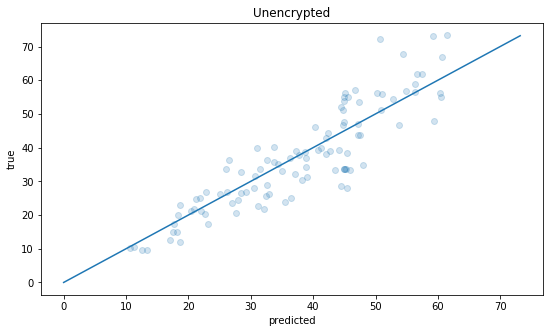

In [70]:
plot_predictions(model.predict(X_test), y_test)

In [107]:
w1, b1, gamma, beta, mean, var, w2, b2 = model.get_weights()

In [108]:
def normalize_weights(w, var, gamma):
    return w * gamma / np.sqrt(var + 0.001)


def normalize_bias(b, mean, var, beta, gamma):
    return (b - mean) * (gamma / np.sqrt(var + 0.001)) + beta

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [109]:
w1 = normalize_weights(w1, var, gamma)
b1 = normalize_bias(b1, mean, var, beta, gamma)

In [110]:
l1 = X_test.dot(w1) + b1
l1 = tanh(l1)
l2 = l1.dot(w2) + b2

In [111]:
msse(l2.flatten(), y_test)

48.70251928232747